In [1]:
import numpy as np
import pandas as pd

In [2]:
retail = pd.read_excel('Online Retail.xlsx')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

### data
 - invoiceNo : 주문번호
 - StockCode : 아이템 아이디
 - Decription : 상품 설명
 - Quantity : 상품 주문 수량
 - InvoiceDate : 주문 시각
 - UnitPrice : 상품 가격(동일한 통화)
 - CustomerID : 고객 아이디
 - Country : 고객 거주 국가

In [5]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


- 데이터 전처리
  - CustomerID 결측값 처리
  - Quantity, UnPrice 음수값 처리

In [6]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

- customerID 결측 값 제거

In [7]:
retail = retail[pd.notnull(retail['CustomerID'])]

In [8]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


- Quantity, UniPrice 음수값 처리

In [9]:
retail = retail[retail["Quantity"] > 0]
retail = retail[retail['UnitPrice'] > 0]

In [10]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [11]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


- 데이터 타입 변경

In [12]:
retail['CustomerID'] = retail['CustomerID'].astype("int")
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.8+ MB


- Price 컬럼 추가
    - $Quantity * UnitPrice$ 총 지출 비용 (Price)

In [13]:
retail['Price'] = retail['UnitPrice'] * retail["Quantity"]
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


- 정제 데이터 저장

In [14]:
retail.to_csv('Online Retail_Cln.csv', sep = ",")

In [15]:
df = pd.read_csv('Online Retail_Cln.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   397884 non-null  int64  
 1   InvoiceNo    397884 non-null  int64  
 2   StockCode    397884 non-null  object 
 3   Description  397884 non-null  object 
 4   Quantity     397884 non-null  int64  
 5   InvoiceDate  397884 non-null  object 
 6   UnitPrice    397884 non-null  float64
 7   CustomerID   397884 non-null  int64  
 8   Country      397884 non-null  object 
 9   Price        397884 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 30.4+ MB


In [17]:
# retail.to_excel('Online Retail_Cln.xlsx')

- 데이터 탐색

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

- 데이터 로딩

In [19]:
retail = pd.read_csv('Online Retail_Cln.csv')
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [20]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   397884 non-null  int64  
 1   InvoiceNo    397884 non-null  int64  
 2   StockCode    397884 non-null  object 
 3   Description  397884 non-null  object 
 4   Quantity     397884 non-null  int64  
 5   InvoiceDate  397884 non-null  object 
 6   UnitPrice    397884 non-null  float64
 7   CustomerID   397884 non-null  int64  
 8   Country      397884 non-null  object 
 9   Price        397884 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 30.4+ MB


In [55]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],
                                     infer_datetime_format = True)
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Unnamed: 0   397884 non-null  int64         
 1   InvoiceNo    397884 non-null  int64         
 2   StockCode    397884 non-null  object        
 3   Description  397884 non-null  object        
 4   Quantity     397884 non-null  int64         
 5   InvoiceDate  397884 non-null  datetime64[ns]
 6   UnitPrice    397884 non-null  float64       
 7   CustomerID   397884 non-null  int64         
 8   Country      397884 non-null  object        
 9   Price        397884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 30.4+ MB


- 전체 매출

In [22]:
total = retail["Price"].sum()
total

8911407.904

- 국가별 매출

<AxesSubplot:ylabel='Country'>

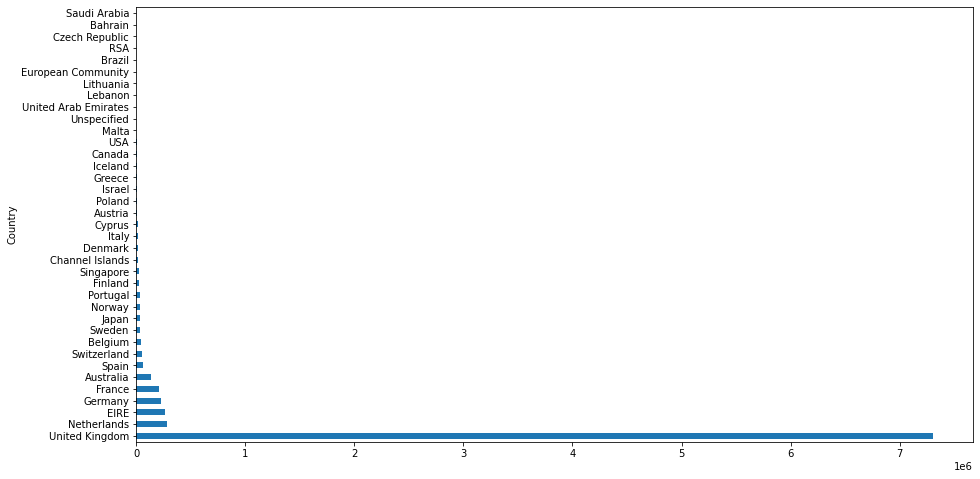

In [64]:
rev_countries = retail.groupby("Country")["Price"].sum().sort_values(ascending =False)
rev_countries.plot(kind = "barh", figsize =(15, 8))

In [24]:
rev_countries / total # 비율로 보기

Country
United Kingdom          0.820116
Netherlands             0.032032
EIRE                    0.029798
Germany                 0.025682
France                  0.023456
Australia               0.015544
Spain                   0.006910
Switzerland             0.006334
Belgium                 0.004623
Sweden                  0.004307
Japan                   0.004199
Norway                  0.004058
Portugal                0.003752
Finland                 0.002530
Singapore               0.002388
Channel Islands         0.002295
Denmark                 0.002127
Italy                   0.001962
Cyprus                  0.001525
Austria                 0.001144
Poland                  0.000823
Israel                  0.000810
Greece                  0.000534
Iceland                 0.000484
Canada                  0.000411
USA                     0.000402
Malta                   0.000306
Unspecified             0.000299
United Arab Emirates    0.000213
Lebanon                 0.000190
Li

- 월별 매출

In [25]:
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [26]:
retail.set_index("InvoiceDate") #InvoiceDate를 인덱스로

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Price
InvoiceDate,,,,,,,,,
2010-12-01 08:26:00,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30
2010-12-01 08:26:00,1,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.34
2010-12-01 08:26:00,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,22.00
2010-12-01 08:26:00,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,20.34
2010-12-01 08:26:00,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
2011-12-09 12:50:00,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680,France,10.20
2011-12-09 12:50:00,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680,France,12.60
2011-12-09 12:50:00,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680,France,16.60


In [27]:
def year_month(date):
    month = str(date.month)
    if date.month < 10:
        month = '0' + month
    return str(date.year) + month

In [28]:
rev_month = retail.set_index('InvoiceDate').groupby(year_month).sum()['Price']
rev_month

201012     572713.890
201101     569445.040
201102     447137.350
201103     595500.760
201104     469200.361
201105     678594.560
201106     661213.690
201107     600091.011
201108     645343.900
201109     952838.382
201110    1039318.790
201111    1161817.380
201112     518192.790
Name: Price, dtype: float64

<AxesSubplot:>

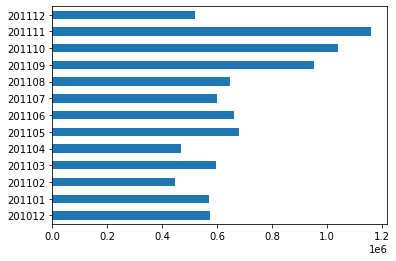

In [65]:
rev_month.plot(kind = 'barh')

- 요일별 매출

In [30]:
rev_dow = retail.set_index('InvoiceDate').groupby(lambda date:date.dayofweek).sum()['Price']
rev_dow #0 = 월요일 , 6 = 일요일

0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: Price, dtype: float64

<AxesSubplot:>

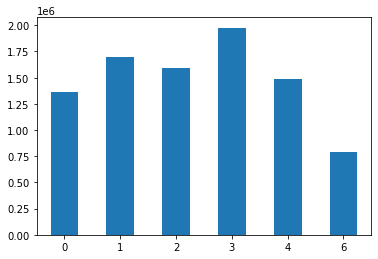

In [31]:
rev_dow.plot(kind="bar", rot = 0)

In [32]:
DOW = np.array(["Mon", "Tue", "Wen", "Thur", "Fri", "Sat", "Sun"])
rev_dow.index = DOW[rev_dow.index]

<AxesSubplot:>

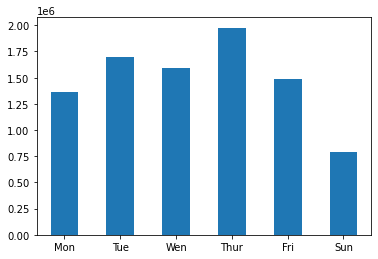

In [33]:
rev_dow.plot(kind="bar", rot = 0)

- 시간별 매출

<AxesSubplot:>

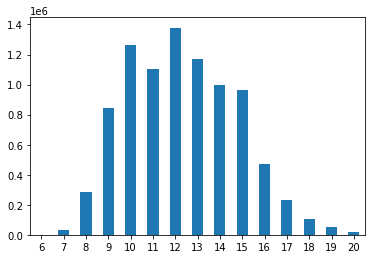

In [67]:
rev_hour = retail.set_index('InvoiceDate').groupby(lambda date:date.hour).sum()['Price']
rev_hour.plot(kind = 'bar', rot = 0)

- 제품별
    - Top 10 판매 제품
    - Top 10 매출 제품

In [69]:
top_sell = retail.groupby('StockCode')["Quantity"].sum().sort_values(ascending = False)[:10]
top_sell

StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int64

In [36]:
top_rev =  retail.groupby('StockCode')["Price"].sum().sort_values(ascending = False)[:10]
top_rev

StockCode
23843     168469.60
22423     142592.95
85123A    100603.50
85099B     85220.78
23166      81416.73
POST       77803.96
47566      68844.33
84879      56580.34
M          53779.93
23084      51346.20
Name: Price, dtype: float64

- 고객별
    - 구매 횟수 기준
    - 지불 금액 기준

In [37]:
retail.groupby('CustomerID')["Quantity"].count().sort_values(ascending = False)

CustomerID
17841    7847
14911    5675
14096    5111
12748    4595
14606    2700
         ... 
15823       1
15802       1
15753       1
15668       1
12346       1
Name: Quantity, Length: 4338, dtype: int64

In [38]:
retail.groupby('CustomerID')["Price"].sum().sort_values(ascending = False)

CustomerID
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
           ...    
16878        13.30
17956        12.75
16454         6.90
14792         6.20
16738         3.75
Name: Price, Length: 4338, dtype: float64

## 고객에게 이벤트 알림, 쿠폰 발송은 언제하는게 좋을까?

In [39]:
order_by_hour = retail.set_index('InvoiceDate').groupby(lambda date : date.hour).count()['CustomerID']
order_by_hour

6         1
7       379
8      8690
9     21944
10    37997
11    49084
12    72065
13    64026
14    54118
15    45369
16    24089
17    13071
18     2928
19     3321
20      802
Name: CustomerID, dtype: int64

<AxesSubplot:>

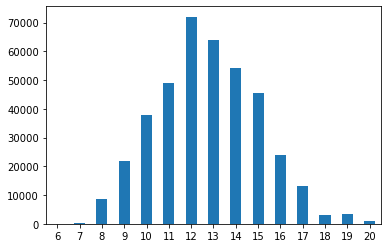

In [40]:
order_by_hour.plot(kind = "bar", rot = 0 )

In [41]:
def half_an_hour(date):
    minute = ":00"
    if date.minute > 30:
        minute = ':30'
    hour = str(date.hour)
    if date.hour < 10:
        hour = '0' + hour
    
    return hour + minute

In [42]:
order_by_hour_half = retail.set_index('InvoiceDate').groupby(half_an_hour).count()['CustomerID']
order_by_hour_half

06:00        1
07:30      379
08:00     3145
08:30     5545
09:00     9364
09:30    12580
10:00    16950
10:30    21047
11:00    18925
11:30    30159
12:00    37174
12:30    34891
13:00    31131
13:30    32895
14:00    26958
14:30    27160
15:00    24227
15:30    21142
16:00    14316
16:30     9773
17:00     8889
17:30     4182
18:00     1715
18:30     1213
19:00     1534
19:30     1787
20:00      802
Name: CustomerID, dtype: int64

<AxesSubplot:>

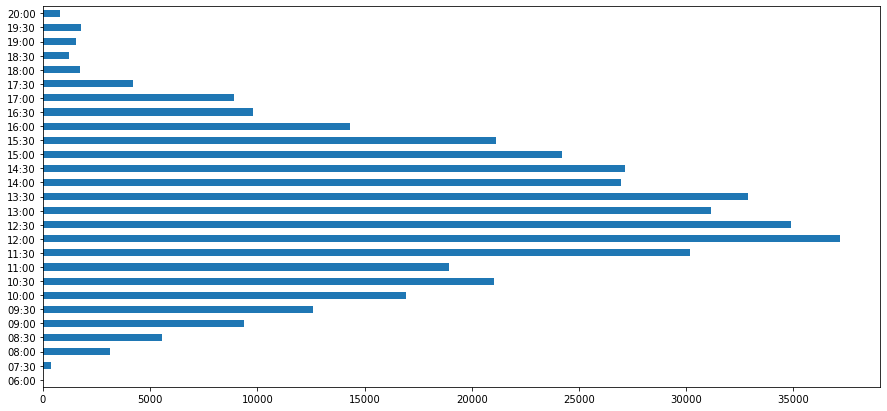

In [73]:
order_by_hour_half.plot(kind = "barh", figsize = (15, 7))

## 고객 별 개인화 알림

- 사용자의 각 시간별 주문량 계산하기

In [44]:
retail.set_index('InvoiceDate').groupby(['CustomerID', lambda date : date.hour]).count()["StockCode"]

CustomerID    
12346       10     1
12347       8     22
            10    24
            12    47
            13    18
                  ..
18283       15     1
            16    56
            19    87
18287       9      3
            10    67
Name: StockCode, Length: 11205, dtype: int64

In [45]:
order_count_by_hour = retail.set_index('InvoiceDate').groupby(['CustomerID', lambda date : date.hour]).count()["StockCode"]
order_count_by_hour

CustomerID    
12346       10     1
12347       8     22
            10    24
            12    47
            13    18
                  ..
18283       15     1
            16    56
            19    87
18287       9      3
            10    67
Name: StockCode, Length: 11205, dtype: int64

- 사용자별 최다 주문 시간 계산하기

In [74]:
idx = order_count_by_hour.groupby('CustomerID').idxmax()
idx

CustomerID
12346    (12346, 10)
12347    (12347, 14)
12348    (12348, 19)
12349     (12349, 9)
12350    (12350, 16)
            ...     
18280     (18280, 9)
18281    (18281, 10)
18282    (18282, 13)
18283    (18283, 14)
18287    (18287, 10)
Name: StockCode, Length: 4338, dtype: object

- 시간 indexing

In [47]:
result = order_count_by_hour.loc[idx]
result

CustomerID    
12346       10      1
12347       14     60
12348       19     17
12349       9      73
12350       16     17
                 ... 
18280       9      10
18281       10      7
18282       13      7
18283       14    201
18287       10     67
Name: StockCode, Length: 4338, dtype: int64

In [48]:
result.reset_index()

,CustomerID,level_1,StockCode
0,12346,10,1
1,12347,14,60
2,12348,19,17
3,12349,9,73
4,12350,16,17
...,...,...,...
4333,18280,9,10
4334,18281,10,7
4335,18282,13,7
4336,18283,14,201


In [49]:
result.reset_index().groupby('level_1').groups

{7: [73, 269, 319, 344, 375, 893, 1667, 2317], 8: [46, 58, 87, 126, 172, 179, 187, 260, 278, 279, 282, 292, 306, 347, 399, 429, 496, 503, 526, 533, 549, 552, 651, 671, 747, 755, 784, 792, 800, 803, 806, 821, 838, 877, 883, 920, 944, 947, 951, 954, 1008, 1093, 1106, 1120, 1138, 1172, 1173, 1217, 1251, 1397, 1422, 1424, 1436, 1472, 1512, 1616, 1621, 1666, 1668, 1678, 1687, 1734, 1759, 1761, 1774, 1791, 1815, 1827, 1846, 1859, 1895, 1900, 1903, 1996, 2018, 2023, 2054, 2085, 2108, 2117, 2167, 2172, 2253, 2380, 2383, 2403, 2404, 2417, 2427, 2462, 2464, 2643, 2749, 2776, 2781, 2896, 2936, 2949, 3021, 3130, ...], 9: [3, 9, 26, 30, 33, 35, 37, 48, 60, 66, 75, 84, 86, 90, 100, 106, 107, 121, 127, 135, 138, 142, 144, 146, 154, 159, 181, 199, 230, 240, 264, 265, 267, 277, 280, 286, 294, 298, 328, 333, 336, 342, 343, 352, 362, 366, 385, 402, 421, 459, 470, 475, 478, 482, 483, 509, 517, 519, 574, 603, 615, 630, 636, 642, 644, 691, 701, 706, 707, 746, 749, 752, 764, 770, 781, 783, 818, 825, 829, 844